
# Qiskit

This notebook is for using the Qiskit Library (basically running programs on IBM's quantum computer.

First step is to install Qiskit and then see the version.
Then we will save an account by entering the API key. Finally we will load the account for running programs on IBM.

In [31]:
!jt -t monokai -f fira -fs 11 -nf ptsans -nfs 11 -N -kl -cursw 2 -cursc r -cellw 95% -T

In [45]:
import qiskit

In [46]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.14.1',
 'qiskit-aer': '0.5.2',
 'qiskit-ignis': '0.3.0',
 'qiskit-ibmq-provider': '0.7.2',
 'qiskit-aqua': '0.7.1',
 'qiskit': '0.19.3'}

In [47]:
from qiskit import IBMQ

In [4]:
IBMQ.save_account('6f0675a7c8d5d3b76695785abf23abd0167c60e951462d6c7f0383b52de6f5a4aa7375f667b449493954a26a96d188f614124421bda8fa1bbb30ab33950cfe1d')


configrc.store_credentials:WARNING:2020-06-09 14:39:18,691: Credentials already present. Set overwrite=True to overwrite.


In [48]:
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2020-06-09 15:01:46,113: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [49]:
from qiskit import *

Now let's get into the interesting details. We are going to use Qubits!

First, we will create 2 qubits and 2 classical bits using the following functions.

In [50]:
qr = QuantumRegister(2)

In [51]:
cr = ClassicalRegister(2)

# Understanding Quantum Programming


Quantum computers are programmed using circuits. Basically, they wan't you to go into the fundamental parts of the technology. In a circuit, you basically have different qubits, on which you can apply different quantum gates (which are similar to classical gates like And, Or, Nor). Here is the full list of quantum gates: https://quantum-computing.ibm.com/docs/circ-comp/q-gates

Also, the way these circuits are shown is with a line. Every qubit has its own line. Imagine the line as showing what is happening to that qubit over time.

In [52]:
circuit = QuantumCircuit(qr, cr)

In [53]:
%matplotlib inline



In [54]:
circuit.draw()

q0_0: 
      
q0_1: 
      
c0_0: 
      
c0_1:

So the above code cell shows no horizontal lines. That's because we haven't added any operations yet. So let's add an H gate. An H gate basically takes the state |0> and turns it into |+>, or takes the state |1> and turns it into |->

In [55]:
circuit.h(qr[0])

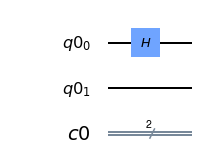

In [56]:
circuit.draw(output='mpl')

We can see that the lines have appeared, and a blue H has come on one of the qubits.

In [57]:
circuit.cx(qr[0], qr[1])

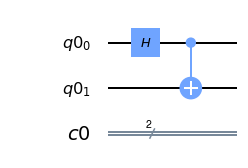

In [58]:
circuit.draw(output='mpl')

In [59]:
circuit.measure(qr, cr)

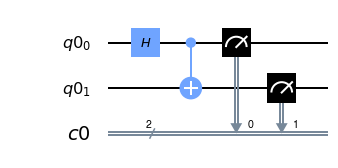

In [60]:
circuit.draw(output='mpl')

In [19]:
simulator = Aer.get_backend('qasm_simulator')

In [61]:
result = execute(circuit, backend = simulator).result()

In [62]:
from qiskit.tools.visualization import plot_histogram

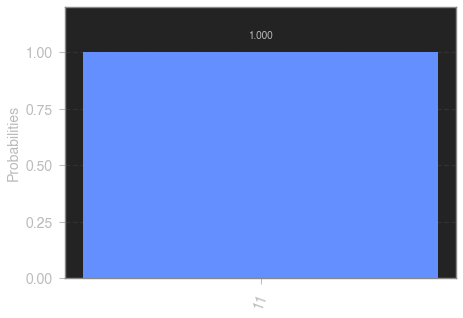

In [63]:
plot_histogram(result.get_counts(circuit))

In [23]:
provider = IBMQ.get_provider('ibm-q')

In [24]:
qcomp = provider.get_backend('ibmq_16_melbourne')

In [25]:
job = execute(circuit, backend=qcomp)

In [26]:
from qiskit.tools.monitor import job_monitor

In [33]:
job_monitor(job)

Job Status: job has successfully run


In [34]:
result = job.result()

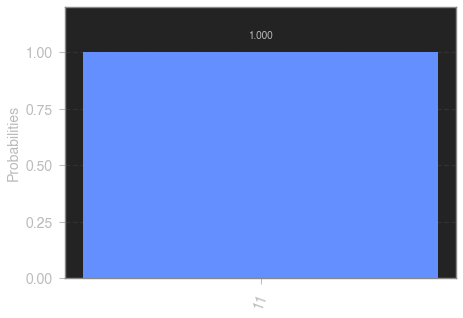

In [64]:
plot_histogram(result.get_counts(circuit))

[0.+0.j 1.+0.j]


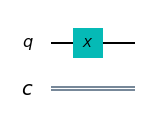

In [65]:
from qiskit.tools.visualization import plot_bloch_multivector

circuit = QuantumCircuit(1, 1)
circuit.x(0)
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend = simulator).result()
statevector = result.get_statevector()
print(statevector)

%matplotlib inline
circuit.draw(output='mpl')

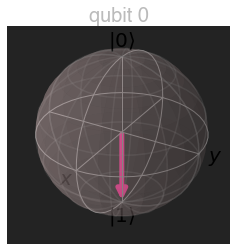

In [66]:
plot_bloch_multivector(statevector)

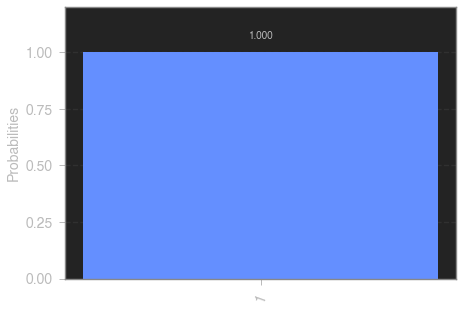

In [67]:
circuit.measure([0], [0])
backend = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=backend, shots=1024).result()
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram

plot_histogram(counts)

[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]


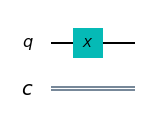

In [68]:
from qiskit.tools.visualization import plot_bloch_multivector

circuit = QuantumCircuit(1, 1)
circuit.x(0)
simulator = Aer.get_backend('unitary_simulator')
result = execute(circuit, backend = simulator).result()
unitary = result.get_unitary()
print(unitary)

%matplotlib inline
circuit.draw(output='mpl')

In [69]:
circuit = QuantumCircuit(3, 3) #3 qubits and 3 classical bits

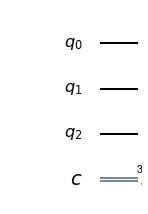

In [70]:
circuit.draw(output='mpl')

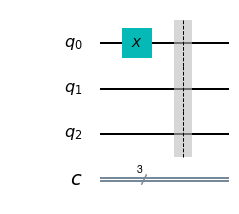

In [71]:
circuit.x(0)   #apply X gate to the first qubit
circuit.barrier()
circuit.draw(output='mpl')

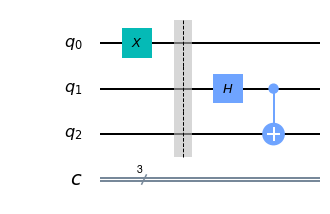

In [72]:
circuit.h(1)
circuit.cx(1, 2)
circuit.draw(output='mpl')

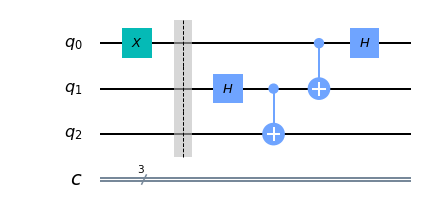

In [35]:
circuit.cx(0, 1)
circuit.h(0)
circuit.draw(output='mpl')

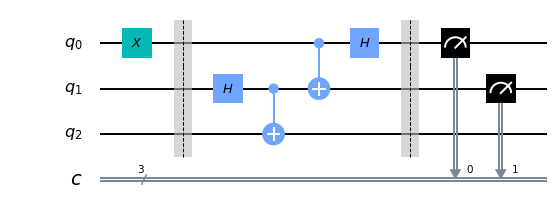

In [36]:
circuit.barrier()
circuit.measure([0, 1], [0, 1])
circuit.draw(output='mpl')

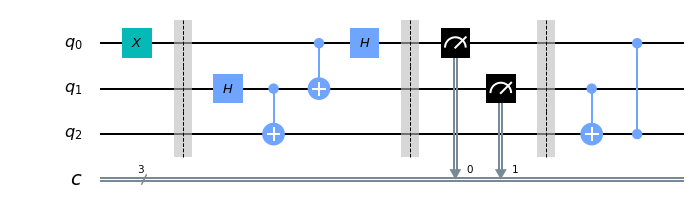

In [37]:
circuit.barrier()
circuit.cx(1, 2)
circuit.cz(0, 2)
circuit.draw(output='mpl')

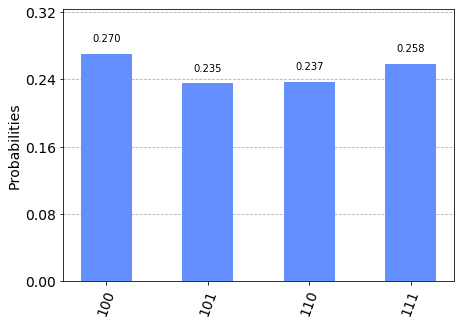

In [38]:
circuit.measure(2, 2)

simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots=1024).result()
counts = result.get_counts()
plot_histogram(counts)

In [44]:
secretnumber = '10001110'

In [46]:
circuit = QuantumCircuit(len(secretnumber)+1, len(secretnumber))


circuit.h(range(len(secretnumber)))
circuit.x(len(secretnumber))
circuit.h(len(secretnumber))

circuit.barrier()

for ii, yesno in enumerate(reversed(secretnumber)):
    if yesno == '1':
        circuit.cx(ii, len(secretnumber))


circuit.barrier()
circuit.h(range(len(secretnumber)))

circuit.barrier()
circuit.measure(range(len(secretnumber)), range(len(secretnmber)))

circuit.draw(output='mpl')

NameError: name 'secretnmber' is not defined

In [47]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1).result()

result.get_counts()

{'00000000': 1}

In [48]:
nqubits = 3
circuit = QuantumCircuit(nqubits, nqubits)
circuit.h(0)
circuit.cx(0, 1)
circuit.cx(1, 2)
circuit.measure([0, 1, 2], [0, 1, 2])

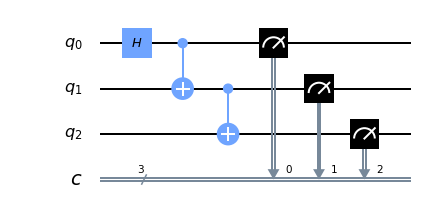

In [49]:
circuit.draw('mpl')

In [50]:
simulator = Aer.get_backend('qasm_simulator')
sim_result = execute(circuit, backend = simulator, shots=1024).result()

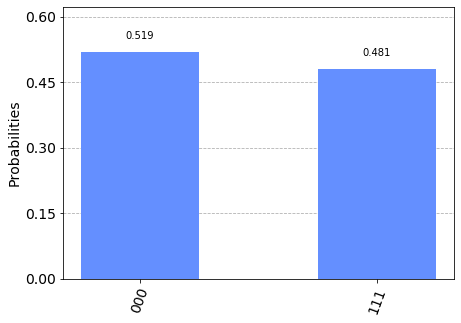

In [51]:
plot_histogram(sim_result.get_counts())

In [52]:
provider = IBMQ.get_provider(hub='ibm-q')
device = provider.get_backend('ibmqx2')

In [53]:
job = execute(circuit, backend=device, shots=1024)
print(job.job_id())
from qiskit.tools.monitor import job_monitor
job_monitor(job)

5edf5220c872b500124de2cc
Job Status: job has successfully run


In [ ]:
device_result = job.result()
plot_histogram(device_result.get_counts())

In [ ]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)

In [156]:
cal_circuits, state_labels = complete_meas_cal(qr = circuit.qregs[0], circlabel='measerrormitigationcal')

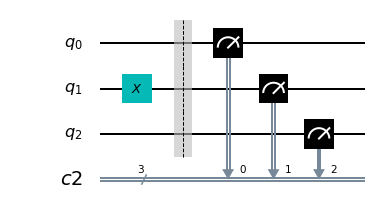

In [157]:
cal_circuits[2].draw(output='mpl')

In [158]:
len(cal_circuits)

8

In [159]:
cal_job = execute(cal_circuits, backend=device, shots=1024, optimization_level=0)

print(cal_job.job_id())
job_monitor(cal_job)
cal_results = cal_job.result()

5edd3f263729e900137d8206
Job Status: job has successfully run


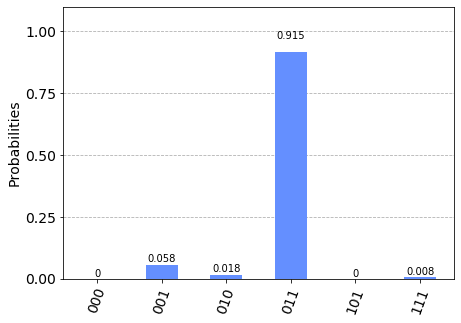

In [160]:
plot_histogram(cal_results.get_counts(cal_circuits[3]))

In [161]:
meas_fitter = CompleteMeasFitter(cal_results, state_labels)

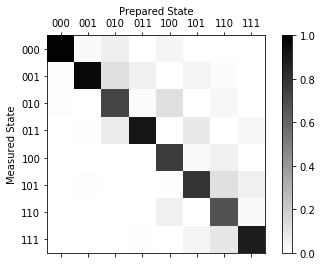

In [162]:
meas_fitter.plot_calibration()

In [163]:
meas_filter = meas_fitter.filter

In [164]:
mitigated_result = meas_filter.apply(device_result)

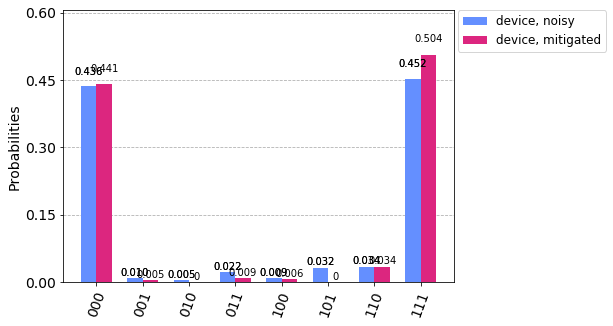

In [165]:
device_counts = device_result.get_counts(circuit)
mitigated_counts = mitigated_result.get_counts(circuit)
plot_histogram([device_counts, mitigated_counts], legend = ['device, noisy', 'device, mitigated'])

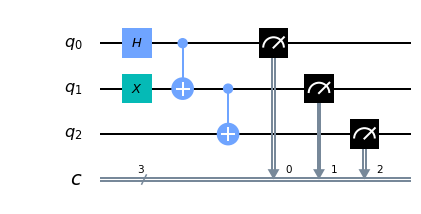

In [166]:
circuit2 = QuantumCircuit(3, 3)
circuit2.x(1)
circuit2.h(0)
circuit2.cx(0, 1)
circuit2.cx(1, 2)
circuit2.measure([0, 1, 2], [0, 1, 2])
circuit2.draw('mpl')

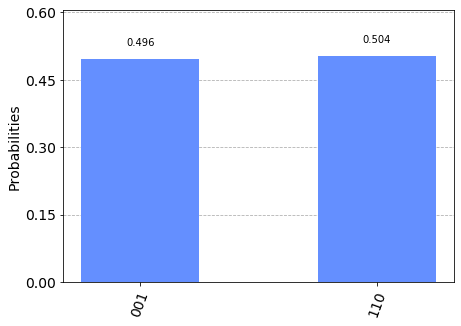

In [167]:
plot_histogram(
    execute(circuit2, backend=simulator, shots = 1024).result().get_counts(circuit2)
)

In [169]:
device_counts_2 = execute(circuit2, backend=device, shots = 1024).result().get_counts(circuit2)

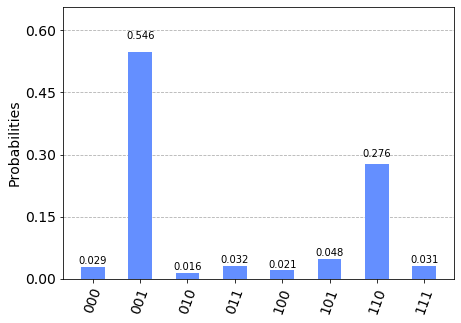

In [170]:
plot_histogram(device_counts_2)

In [44]:
device_mitigated_counts_2 = meas_filter.apply(device_counts_2)
plot_histogram([device_counts_2, device_mitigated_counts_2], legend=['raw', 'mitigated'])

NameError: name 'meas_filter' is not defined

In [22]:
print('helloworld')

helloworld


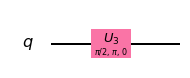

In [23]:
qc.draw('mpl')

In [24]:
import math
pi = math.pi

In [25]:
qc = QuantumCircuit(1)
qc.u3(pi/2, pi, 0, 0)

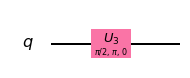

In [26]:
qc.draw('mpl')

In [27]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(qc, backend = simulator).result()
statevector = result.get_statevector()
print(statevector)


[ 0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j]


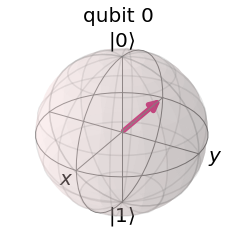

In [28]:
plot_bloch_multivector(statevector)

In [43]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

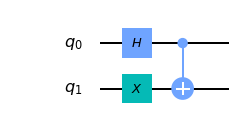

In [80]:
qc = QuantumCircuit(2)
qc.h(0)
#qc.h(1)
qc.x(1)
qc.cx(0, 1)
qc.draw('mpl')

In [81]:
backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc, backend).result().get_statevector()

In [82]:
final_state

array([0.        +0.j, 0.70710678+0.j, 0.70710678+0.j, 0.        +0.j])

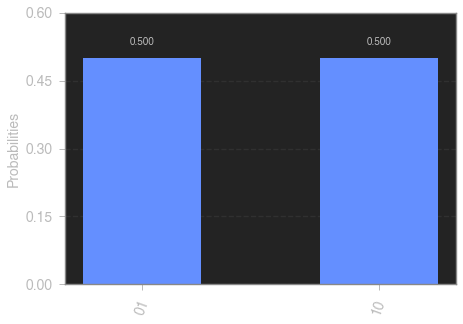

In [83]:
results = execute(qc, backend).result().get_counts()
plot_histogram(results)